<a href="https://colab.research.google.com/github/Ashwinkpv/DSA-assignment/blob/main/PROJECT_HANDWRIETE_RECOGONITION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout
from keras.layers import concatenate
# the data, split between train and test sets

In [ ]:
(x1_train, y1_train), (x1_test, y1_test)=mnist.load_data()
print(x1_train.shape, y1_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)


In [ ]:
y1_train = y1_train+26
y1_test = y1_test+26

In [ ]:
df1=pd.DataFrame(mnist.load_data())

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df2=pd.read_csv("/content/drive/MyDrive/IAM dataset.zip (Unzipped Files)/A_Z Handwritten Data.csv")


In [ ]:
df2

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,...,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617,0.618,0.619,0.620,0.621,0.622,0.623,0.624,0.625,0.626,0.627,0.628,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
372446,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
372447,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
372448,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y2=df2.iloc[:,0]
x2=df2.iloc[:,1:].values


In [ ]:
y2.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [ ]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z',26:"0",27:"1",28:"2",29:"3",30:"4",31:"5",32:"6",33:"7",34:"8",35:"9"}

In [ ]:
from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2, test_size = 0.33, random_state = 42)
print(x2_train.shape,y2_train.shape)
print(x2_test.shape,y2_test.shape)

(249541, 784) (249541,)
(122909, 784) (122909,)


In [ ]:
x2_train = np.reshape(x2_train,(x2_train.shape[0],28,28,1))
x2_test = np.reshape(x2_test,(x2_test.shape[0],28,28,1))

In [ ]:
print(x2_train.shape,y2_train.shape)
print(x2_test.shape,y2_test.shape)

(249541, 28, 28, 1) (249541,)
(122909, 28, 28, 1) (122909,)


In [ ]:
x1_train = np.reshape(x1_train,(x1_train.shape[0],28,28,1))
x1_test = np.reshape(x1_test,(x1_test.shape[0],28,28,1))

In [ ]:
print(x1_train.shape,y1_train.shape)
print(x1_test.shape,y1_test.shape)

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


In [ ]:
xtrain = []
for i in x2_train:
  xtrain.append(i)

In [ ]:
for i in x1_train:
  xtrain.append(i)

In [ ]:
xtrain = np.array(xtrain)
xtrain.shape

(309541, 28, 28, 1)

In [ ]:
ytrain = []
for i in y2_train:
  ytrain.append(i)

In [ ]:
for i in y1_train:
  ytrain.append(i)

In [ ]:
ytrain = np.array(ytrain)
ytrain.shape

(309541,)

In [ ]:
xtest=[]
for i in x2_test:
  xtest.append(i)

In [ ]:
for i in x1_test:
  xtest.append(i)

In [ ]:
xtest=np.array(xtest)
xtest.shape

(132909, 28, 28, 1)

In [ ]:
ytest=[]
for i in y2_test:
  ytest.append(i)

In [ ]:
for i in y1_test:
  ytest.append(i)

In [ ]:
ytest=np.array(ytest)
ytest.shape

(132909,)

In [ ]:
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(309541, 28, 28, 1) (309541,)
(132909, 28, 28, 1) (132909,)


In [ ]:
model1 = Sequential()
model1.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape= xtrain.shape[1:] ))

model1.add(MaxPool2D(pool_size=(2, 2), strides=2))
model1.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model1.add(MaxPool2D(pool_size=(2, 2), strides=2))
model1.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model1.add(MaxPool2D(pool_size=(2, 2), strides=2))
model1.add(Dropout(0.2))
model1.add(Flatten())
model1.add(Dense(64,activation ="relu"))
model1.add(Dense(128,activation ="relu"))
model1.add(Dense(36,activation ="softmax"))
model1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 2, 2, 128)       

In [ ]:
model1.fit(xtrain, ytrain, epochs=1,  validation_data = (xtest,ytest))

9674/9674 [==============================] - 446s 46ms/step - loss: 0.2928 - accuracy: 0.9164 - val_loss: 0.1119 - val_accuracy: 0.9693


In [ ]:
predict = model1.predict(xtest) 

In [ ]:
import numpy as np
pred = np.argmax(predict,axis=1)
pred

array([12, 18,  2, ..., 30, 31, 32])

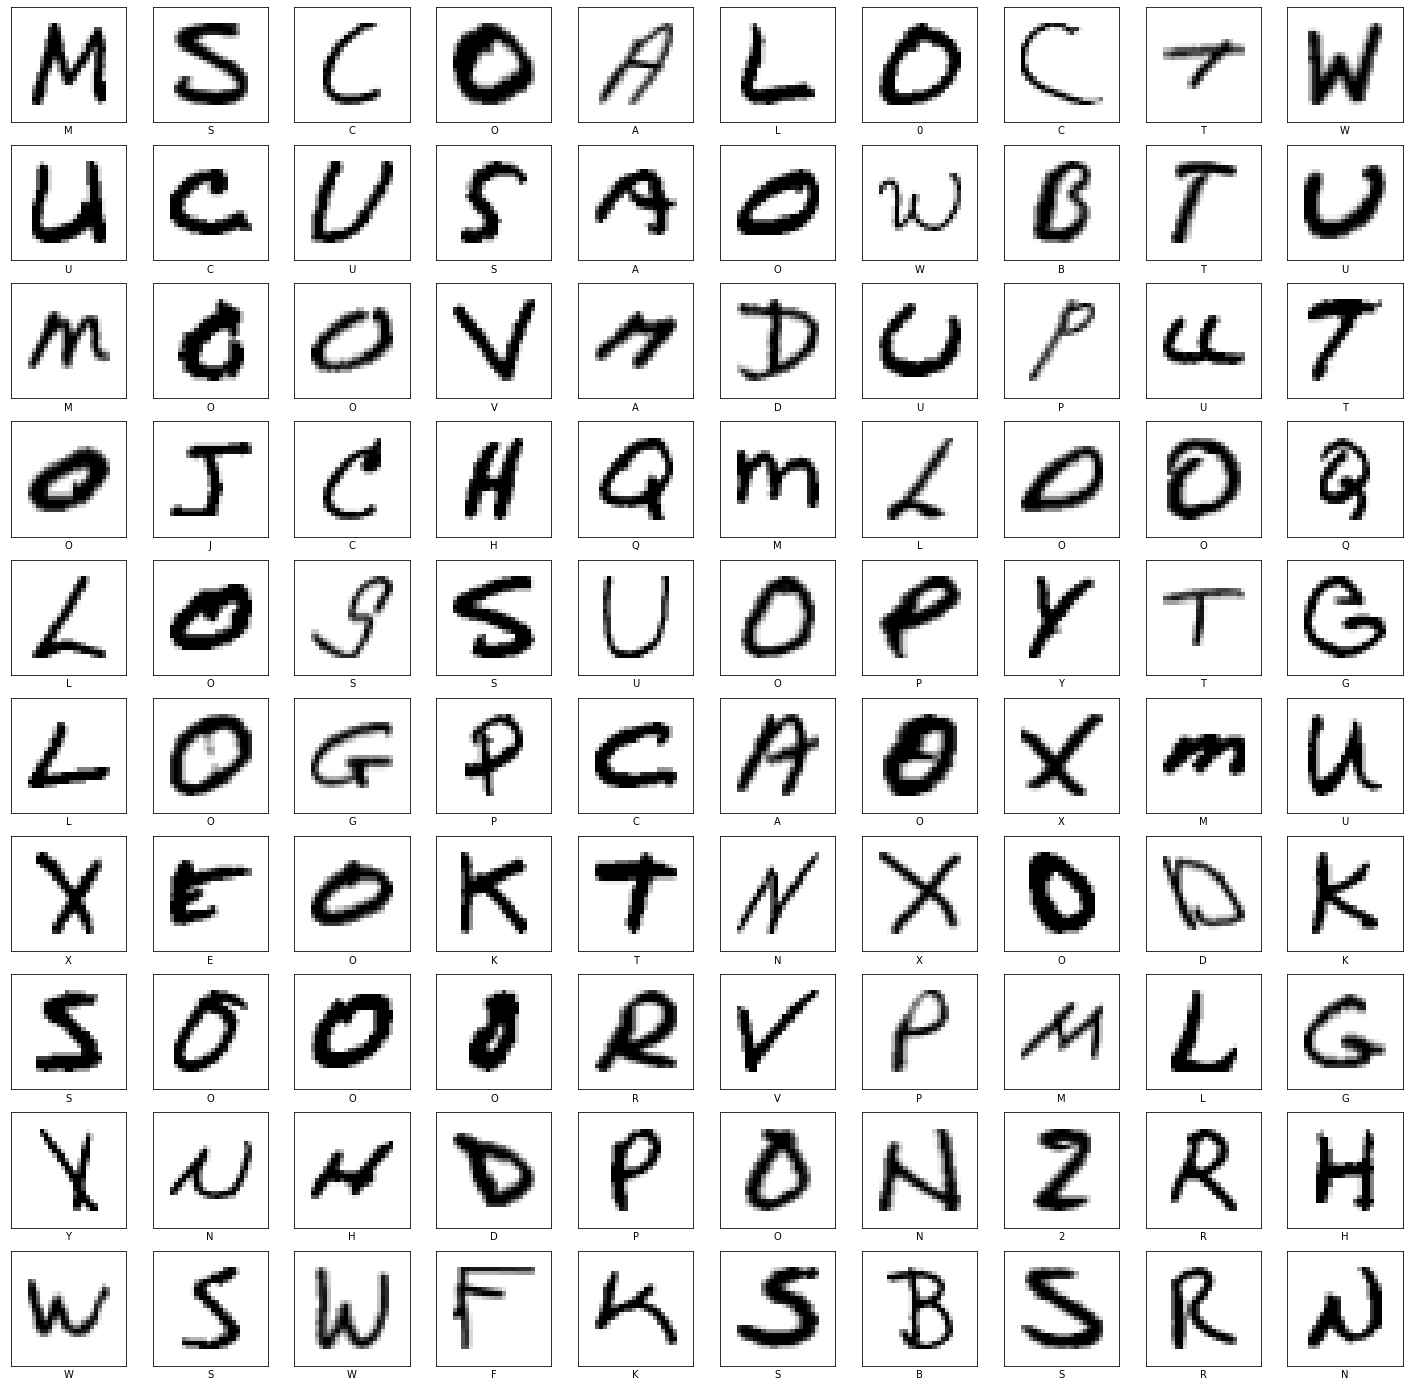

In [ ]:
plt.figure(figsize=(25,25))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(tf.squeeze(xtest[i]), cmap=plt.cm.binary)
    plt.xlabel(word_dict[pred[i]])
plt.show()

In [ ]:
from google.colab import files
up = files.upload()

Saving A.jpg to A.jpg


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


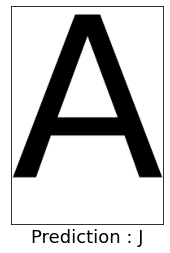

In [ ]:
import cv2
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import pytesseract
from PIL import Image
from pytesseract import image_to_string

# read image
image = cv2.imread("A.jpg")
img = load_img("A.jpg", grayscale=True, target_size=(28, 28))


# image preprocessing
img = img_to_array(img)
img = img.reshape(1, 28, 28,1 )
img = img.astype('float32')
img = img / 255.0
#print(image.shape)

# predction
res = model1.predict(img)
result = np.argmax(res,axis=1)

  
# For getting the text and number from image
# display image with prediction
plt.imshow(image)
plt.xlabel("Prediction : "+word_dict[result[0]],fontsize=18)
plt.xticks([])
plt.yticks([])
plt.show()